The Final Mission
Pada captsone kali ini, Bapak Ibu bisa memilih salah satu soal ini untuk dikerjakan.

Data kurs Japan Yen ke rupiah pada tahun 2019 dari monexnews.com/kurs-valuta-asing.htm?kurs=JPY

Dari halaman tersebut carilah kurs jual, Kurs beli dan tanggal
Bualah plot pergerakan kurs JPY pada tahun 2019


Data film yang rilis di tahun 2019 dari imdb.com/search/title/?release_date=2019-01-01,2019-12-31

Dari Halaman tersebut carilah `judul` , `imdb rating` , `metascore`, dan `votes`
Buatlah plot dari 7 film paling populer di tahun 2019.
Happy learning~

Rubics
* Environment preparation (2 points)
* Finding the right key to scrap the data & Extracting the right information (6 points)
* Creating data frame & Data wrangling (6 points)
* Implement it on flask dashboard (2 points)

In [24]:
import requests
import pandas as pd
from bs4 import BeautifulSoup


url_get = requests.get('https://www.imdb.com/search/title/?release_date=2019-01-01,2019-12-31')

In [25]:
soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [64]:
#print(soup.prettify()[:1045])

In [113]:
movie_list = soup.find('div', attrs={'class':'lister-list'})
#print(movie_list.prettify()[1:10000])

In [117]:
movie_list_array = movie_list.findAll('div', attrs={'class':'lister-item-content'})
movie = movie_list_array[0]
#movie_list_array

In [118]:
judul = movie.find('h3', attrs={'class':'lister-item-header'}).find('a').text # just call 2 founded tr
judul

imdb_rating = movie.find('div',attrs={'class':'inline-block ratings-imdb-rating'}).find('strong').text
imdb_rating

metascore = movie.find('div',attrs={'class':'inline-block ratings-metascore'}).find('span').text.strip()
metascore

votes = movie.find('span',attrs={'name':'nv'}).text.strip()
votes

'3,895'

In [119]:
temp = [] #initiating a tuple

for i in range(0, len(movie_list_array)):
    
    movie = movie_list_array[i]
    #get Judul
    judul = movie.find('h3', attrs={'class':'lister-item-header'}).find('a').text.strip()
    imdb_rating = movie.find('div',attrs={'class':'inline-block ratings-imdb-rating'}).find('strong').text.strip()
    if movie.find('div',attrs={'class':'inline-block ratings-metascore'}) is None:
        metascore = 0
    else:
        metascore = movie.find('div',attrs={'class':'inline-block ratings-metascore'}).find('span').text.strip()
    votes = movie.find('span',attrs={'name':'nv'}).text.strip()
    temp.append((judul, imdb_rating, metascore, votes)) 
    
#temp

In [120]:
df = pd.DataFrame(temp, columns = ('judul','imdb_rating', 'metascore','votes'))
df.head()
df.dtypes

judul          object
imdb_rating    object
metascore      object
votes          object
dtype: object

In [121]:
df['judul'] = df['judul'].astype('category')
df['imdb_rating'] = df['imdb_rating'].astype('float64')
df['votes'] = df['votes'].str.replace(",","")
df['votes'] = df['votes'].astype('int')
df['metascore'] = df['metascore'].astype('float64')
df.dtypes

judul          category
imdb_rating     float64
metascore       float64
votes             int32
dtype: object

In [122]:
df

,judul,imdb_rating,metascore,votes
0,Sex Education,8.3,0.0,99428
1,1917,8.5,78.0,112922
2,The Witcher,8.4,0.0,203939
3,Gisaengchung,8.6,96.0,175886
4,Once Upon a Time ...in Hollywood,7.8,83.0,356116
5,Joker,8.6,59.0,640018
6,The Gentlemen,8.1,51.0,15876
7,Jojo Rabbit,8.0,58.0,66169
8,Little Women,8.1,91.0,37783
9,The Mandalorian,8.8,0.0,125619


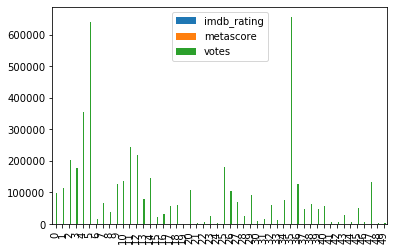

In [124]:
df.plot(kind="bar"
)